In [1]:
!pip install genbooster
!pip install nnetsauce

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 425.0/425.0 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.7/203.7 kB 10.0 MB/s eta 0:00:00


Examining the magnitude of overfitting on balanced accuracy using default hyperparameters vs GenericBooster + LinearRegression. But which one is better?

In [2]:
import xgboost as xgb
import joblib
import requests
import io

from genbooster.genboosterclassifier import BoosterClassifier
from genbooster.randombagclassifier import RandomBagClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.gaussian_process import GaussianProcessRegressor
from tqdm import tqdm
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from time import time

In [3]:

# Fetch the file content from the URL - **Use the raw file URL!**
url = 'https://github.com/thierrymoudiki/openml-cc18-reduced/raw/main/openml-cc18-Xys-2024-05-20.pkl'

# Use a session to handle potential connection interruptions
session = requests.Session()
response = session.get(url, stream=True)
response.raise_for_status()  # Raise an exception for bad responses

# Load the data from the downloaded content in chunks
with io.BytesIO() as buffer:
    for chunk in response.iter_content(chunk_size=1024*1024):  # Download in 1MB chunks
        buffer.write(chunk)
    buffer.seek(0)  # Reset buffer position to the beginning
    clf_datasets = joblib.load(buffer)

# 1 - xgboost

In [4]:
results = {}

balanced_accuracy_scorer = make_scorer(balanced_accuracy_score)

for i, dataset in tqdm(enumerate(clf_datasets.items())):
  dataset_name = dataset[0]
  print("\n ----------", (i + 1), "/", len(clf_datasets.items()), ": ", dataset_name)
  try:
    X, y = dataset[1]['dataset'][0], dataset[1]['dataset'][1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    # Split dataset into training and testing sets
    model = xgb.XGBClassifier()
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred = model.predict(X_test)
    # Calculate balanced accuracy
    balanced_acc_train = balanced_accuracy_score(y_train, y_pred_train)
    balanced_acc_test = balanced_accuracy_score(y_test, y_pred)
    print("Training Balanced Accuracy:", balanced_acc_train)
    print("Testing Balanced Accuracy:", balanced_acc_test)
    results[dataset_name] = {"training_score": balanced_acc_train,
                             "testing_score": balanced_acc_test}
  except:
    print("Error")


0it [00:00, ?it/s]


 ---------- 1 / 72 :  kr-vs-kp


1it [00:00,  4.01it/s]

Training Balanced Accuracy: 0.9793965874420882
Testing Balanced Accuracy: 0.975187969924812

 ---------- 2 / 72 :  letter


2it [00:03,  2.19s/it]

Training Balanced Accuracy: 1.0
Testing Balanced Accuracy: 0.7513736263736264

 ---------- 3 / 72 :  balance-scale


3it [00:04,  1.52s/it]

Training Balanced Accuracy: 1.0
Testing Balanced Accuracy: 0.7260334744908249

 ---------- 4 / 72 :  mfeat-factors


4it [00:09,  2.97s/it]

Training Balanced Accuracy: 1.0
Testing Balanced Accuracy: 0.86

 ---------- 5 / 72 :  mfeat-fourier


5it [00:16,  4.19s/it]

Training Balanced Accuracy: 1.0
Testing Balanced Accuracy: 0.86

 ---------- 6 / 72 :  breast-w


6it [00:17,  3.20s/it]

Training Balanced Accuracy: 1.0
Testing Balanced Accuracy: 0.9470108695652174

 ---------- 7 / 72 :  mfeat-karhunen


7it [00:22,  3.84s/it]

Training Balanced Accuracy: 1.0
Testing Balanced Accuracy: 0.905

 ---------- 8 / 72 :  mfeat-morphological


8it [00:22,  2.76s/it]

Training Balanced Accuracy: 0.9862499999999998
Testing Balanced Accuracy: 0.7950000000000002

 ---------- 9 / 72 :  mfeat-zernike


10it [00:23,  1.46s/it]

Training Balanced Accuracy: 0.99875
Testing Balanced Accuracy: 0.7799999999999999

 ---------- 10 / 72 :  cmc
Training Balanced Accuracy: 0.9798009974256786
Testing Balanced Accuracy: 0.6773695839418791

 ---------- 11 / 72 :  optdigits


13it [00:23,  1.66it/s]

Training Balanced Accuracy: 1.0
Testing Balanced Accuracy: 0.905

 ---------- 12 / 72 :  credit-approval
Training Balanced Accuracy: 1.0
Testing Balanced Accuracy: 0.8353204172876304

 ---------- 13 / 72 :  credit-g
Training Balanced Accuracy: 1.0
Testing Balanced Accuracy: 0.6797619047619048

 ---------- 14 / 72 :  pendigits


16it [00:24,  3.01it/s]

Training Balanced Accuracy: 1.0
Testing Balanced Accuracy: 0.9240601503759398

 ---------- 15 / 72 :  diabetes
Training Balanced Accuracy: 1.0
Testing Balanced Accuracy: 0.7112962962962963

 ---------- 16 / 72 :  spambase
Training Balanced Accuracy: 1.0
Testing Balanced Accuracy: 0.9041740767862747

 ---------- 17 / 72 :  splice


18it [00:24,  4.30it/s]

Training Balanced Accuracy: 1.0
Testing Balanced Accuracy: 0.9529914529914528

 ---------- 18 / 72 :  tic-tac-toe
Training Balanced Accuracy: 1.0
Testing Balanced Accuracy: 0.9776119402985075

 ---------- 19 / 72 :  vehicle
Training Balanced Accuracy: 1.0
Testing Balanced Accuracy: 0.7570075757575757

 ---------- 20 / 72 :  electricity


21it [00:24,  5.32it/s]

Training Balanced Accuracy: 1.0
Testing Balanced Accuracy: 0.778005115089514

 ---------- 21 / 72 :  satimage
Training Balanced Accuracy: 1.0
Testing Balanced Accuracy: 0.8195766960114664

 ---------- 22 / 72 :  eucalyptus


22it [00:25,  5.05it/s]

Training Balanced Accuracy: 1.0
Testing Balanced Accuracy: 0.6379919821780285

 ---------- 23 / 72 :  sick
Training Balanced Accuracy: 1.0
Testing Balanced Accuracy: 0.9583333333333333

 ---------- 24 / 72 :  vowel


24it [00:25,  4.56it/s]

Training Balanced Accuracy: 1.0
Testing Balanced Accuracy: 0.898989898989899

 ---------- 25 / 72 :  isolet


25it [00:26,  2.19it/s]

Training Balanced Accuracy: 1.0
Testing Balanced Accuracy: 0.6002747252747253

 ---------- 26 / 72 :  analcatdata_authorship
Training Balanced Accuracy: 1.0
Testing Balanced Accuracy: 0.9850446428571429

 ---------- 27 / 72 :  analcatdata_dmft


27it [00:27,  2.97it/s]

Training Balanced Accuracy: 0.5354622066211941
Testing Balanced Accuracy: 0.1808442851453604

 ---------- 28 / 72 :  mnist_784


30it [00:27,  3.67it/s]

Training Balanced Accuracy: 0.9974358974358974
Testing Balanced Accuracy: 0.5634728124659475

 ---------- 29 / 72 :  pc4
Training Balanced Accuracy: 1.0
Testing Balanced Accuracy: 0.7357954545454546

 ---------- 30 / 72 :  pc3
Training Balanced Accuracy: 0.9939024390243902
Testing Balanced Accuracy: 0.7138888888888889

 ---------- 31 / 72 :  jm1


33it [00:28,  5.62it/s]

Training Balanced Accuracy: 0.9894845464612907
Testing Balanced Accuracy: 0.6519350215002389

 ---------- 32 / 72 :  kc2
Training Balanced Accuracy: 0.9764705882352941
Testing Balanced Accuracy: 0.6002190580503833

 ---------- 33 / 72 :  kc1
Training Balanced Accuracy: 0.9660003848559195
Testing Balanced Accuracy: 0.7827829738499714

 ---------- 34 / 72 :  pc1


35it [00:28,  7.30it/s]

Training Balanced Accuracy: 0.9818181818181818
Testing Balanced Accuracy: 0.7803379416282642

 ---------- 35 / 72 :  adult
Training Balanced Accuracy: 1.0
Testing Balanced Accuracy: 0.7384868421052632

 ---------- 36 / 72 :  Bioresponse
Training Balanced Accuracy: 1.0
Testing Balanced Accuracy: 0.7790603891521323

 ---------- 37 / 72 :  wdbc


39it [00:28,  9.19it/s]

Training Balanced Accuracy: 1.0
Testing Balanced Accuracy: 0.933531746031746

 ---------- 38 / 72 :  phoneme
Training Balanced Accuracy: 1.0
Testing Balanced Accuracy: 0.8967423969227071

 ---------- 39 / 72 :  qsar-biodeg
Training Balanced Accuracy: 1.0
Testing Balanced Accuracy: 0.9139827179890023

 ---------- 40 / 72 :  wall-robot-navigation
Training Balanced Accuracy: 1.0
Testing Balanced Accuracy: 0.9885802469135803

 ---------- 41 / 72 :  semeion


43it [00:29,  8.21it/s]

Training Balanced Accuracy: 0.6431816659664762
Testing Balanced Accuracy: 0.63

 ---------- 42 / 72 :  ilpd
Training Balanced Accuracy: 1.0
Testing Balanced Accuracy: 0.5405740609496811

 ---------- 43 / 72 :  madelon
Training Balanced Accuracy: 1.0
Testing Balanced Accuracy: 0.845

 ---------- 44 / 72 :  nomao


45it [00:29,  9.50it/s]

Training Balanced Accuracy: 0.9890350877192983
Testing Balanced Accuracy: 0.9456508403876824

 ---------- 45 / 72 :  ozone-level-8hr
Training Balanced Accuracy: 1.0
Testing Balanced Accuracy: 0.7531879884821061

 ---------- 46 / 72 :  cnae-9
Training Balanced Accuracy: 0.7333304959709455
Testing Balanced Accuracy: 0.699604743083004

 ---------- 47 / 72 :  first-order-theorem-proving


50it [00:30,  7.28it/s]

Training Balanced Accuracy: 0.9974161661661661
Testing Balanced Accuracy: 0.44510582010582017

 ---------- 48 / 72 :  banknote-authentication
Training Balanced Accuracy: 1.0
Testing Balanced Accuracy: 1.0

 ---------- 49 / 72 :  blood-transfusion-service-center
Training Balanced Accuracy: 0.8398196194712132
Testing Balanced Accuracy: 0.6754385964912281

 ---------- 50 / 72 :  PhishingWebsites
Training Balanced Accuracy: 0.9715260585285342
Testing Balanced Accuracy: 0.9516145358841988

 ---------- 51 / 72 :  cylinder-bands


52it [00:30,  8.60it/s]

Training Balanced Accuracy: 1.0
Testing Balanced Accuracy: 0.8183730715287517

 ---------- 52 / 72 :  bank-marketing
Training Balanced Accuracy: 1.0
Testing Balanced Accuracy: 0.6352247605011054

 ---------- 53 / 72 :  GesturePhaseSegmentationProcessed
Training Balanced Accuracy: 1.0
Testing Balanced Accuracy: 0.473961038961039

 ---------- 54 / 72 :  har


54it [00:31,  4.44it/s]

Training Balanced Accuracy: 1.0
Testing Balanced Accuracy: 0.7054457054457054

 ---------- 55 / 72 :  dresses-sales
Training Balanced Accuracy: 0.9970238095238095
Testing Balanced Accuracy: 0.5472085385878489

 ---------- 56 / 72 :  texture


57it [00:31,  5.19it/s]

Training Balanced Accuracy: 1.0
Testing Balanced Accuracy: 0.9494949494949495

 ---------- 57 / 72 :  connect-4
Training Balanced Accuracy: 0.8687185238384995
Testing Balanced Accuracy: 0.490677451203767

 ---------- 58 / 72 :  MiceProtein


58it [00:32,  4.66it/s]

Training Balanced Accuracy: 1.0
Testing Balanced Accuracy: 0.9510996240601504

 ---------- 59 / 72 :  steel-plates-fault


59it [00:32,  3.88it/s]

Training Balanced Accuracy: 1.0
Testing Balanced Accuracy: 0.8302055604850634

 ---------- 60 / 72 :  climate-model-simulation-crashes
Training Balanced Accuracy: 1.0
Testing Balanced Accuracy: 0.7222222222222222

 ---------- 61 / 72 :  wilt
Training Balanced Accuracy: 0.9880952380952381
Testing Balanced Accuracy: 0.9090909090909092

 ---------- 62 / 72 :  car


62it [00:32,  5.28it/s]

Training Balanced Accuracy: 1.0
Testing Balanced Accuracy: 0.9357142857142857

 ---------- 63 / 72 :  segment


63it [00:34,  1.90it/s]

Training Balanced Accuracy: 0.9974826446647592
Testing Balanced Accuracy: 0.9649894440534835

 ---------- 64 / 72 :  mfeat-pixel


64it [00:35,  2.15it/s]

Training Balanced Accuracy: 0.9012499999999999
Testing Balanced Accuracy: 0.7649999999999999

 ---------- 65 / 72 :  Fashion-MNIST


66it [00:36,  2.41it/s]

Training Balanced Accuracy: 1.0
Testing Balanced Accuracy: 0.545

 ---------- 66 / 72 :  jungle_chess_2pcs_raw_endgame_complete
Training Balanced Accuracy: 1.0
Testing Balanced Accuracy: 0.7222113037136032

 ---------- 67 / 72 :  numerai28.6


67it [00:36,  2.87it/s]

Training Balanced Accuracy: 1.0
Testing Balanced Accuracy: 0.5044004400440043

 ---------- 68 / 72 :  Devnagari-Script


68it [00:38,  1.32it/s]

Training Balanced Accuracy: 0.9909686700767264
Testing Balanced Accuracy: 0.2217391304347826

 ---------- 69 / 72 :  CIFAR_10


71it [00:39,  2.08it/s]

Training Balanced Accuracy: 1.0
Testing Balanced Accuracy: 0.215

 ---------- 70 / 72 :  Internet-Advertisements
Training Balanced Accuracy: 0.967741724282422
Testing Balanced Accuracy: 0.9613787375415282

 ---------- 71 / 72 :  dna
Training Balanced Accuracy: 0.9147506693440429
Testing Balanced Accuracy: 0.9043803418803419

 ---------- 72 / 72 :  churn


72it [00:39,  1.84it/s]

Training Balanced Accuracy: 1.0
Testing Balanced Accuracy: 0.9111295681063123


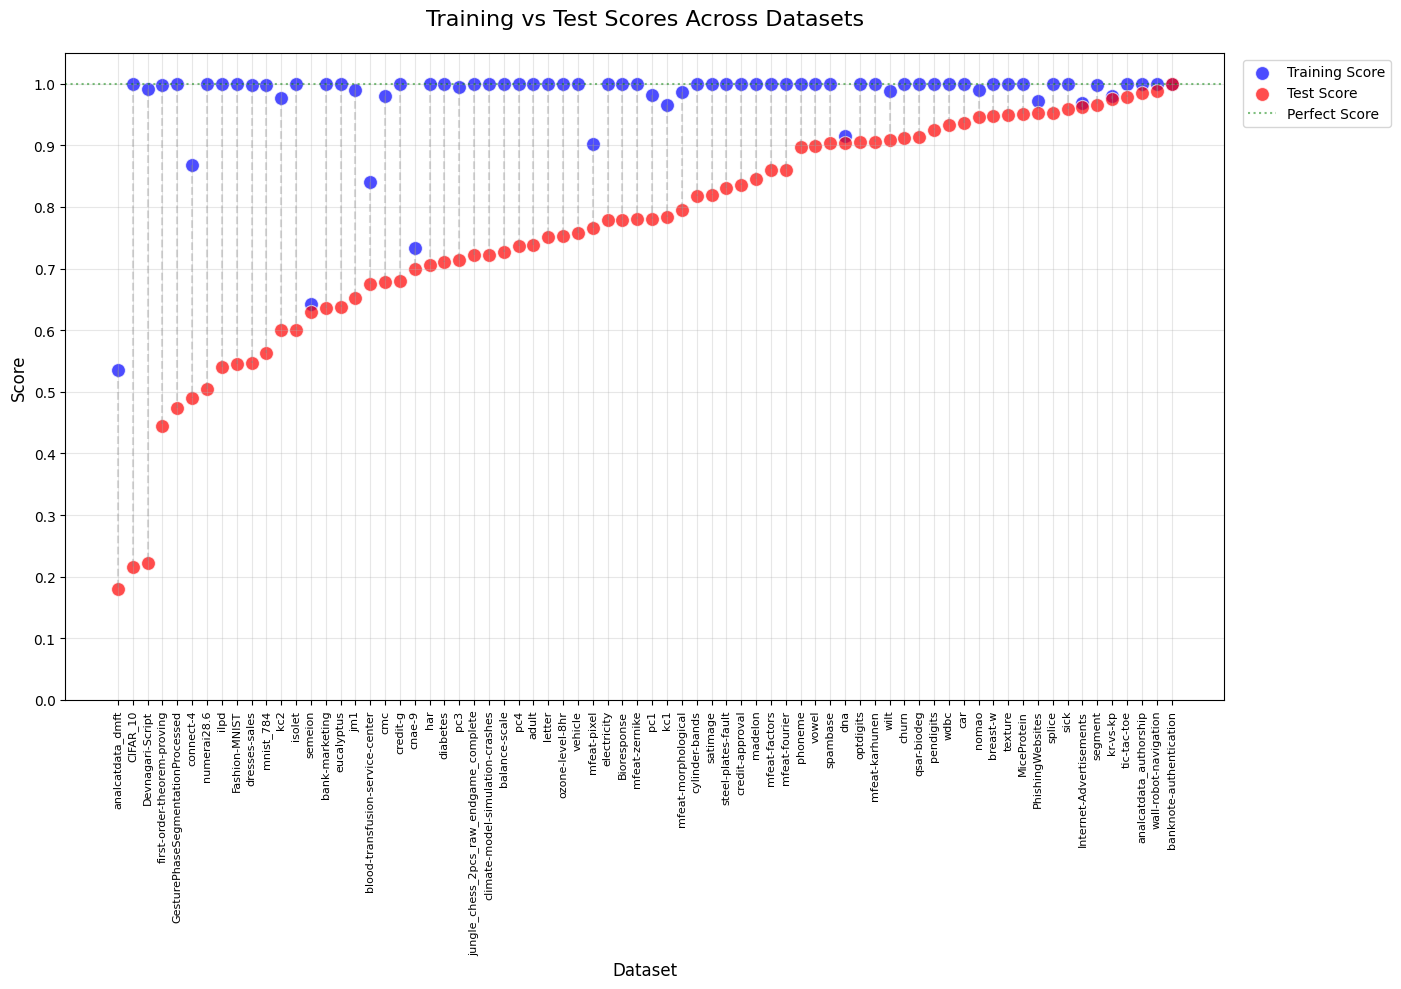

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Your data
data = results

# Convert to DataFrame - correct approach
df = pd.DataFrame.from_dict({(i,j): data[i][j]
                           for i in data.keys()
                           for j in data[i].keys()},
                          orient='index')

# The index is a MultiIndex with (dataset, score_type)
# Let's properly unpack it
df = df.reset_index()
df.columns = ['index', 'score']  # Temporary column names

# Split the multi-index into separate columns
df[['dataset', 'score_type']] = pd.DataFrame(df['index'].tolist(), index=df.index)
df = df.drop(columns=['index'])

# Now pivot the data
plot_df = df.pivot(index='dataset', columns='score_type', values='score')

# Sort by test score for better visualization
plot_df = plot_df.sort_values('testing_score')

# Create figure
plt.figure(figsize=(14, 10), dpi=100)

# Plot training and test scores
sns.scatterplot(data=plot_df, x=plot_df.index, y='training_score',
                color='blue', label='Training Score', s=100, alpha=0.7)
sns.scatterplot(data=plot_df, x=plot_df.index, y='testing_score',
                color='red', label='Test Score', s=100, alpha=0.7)

# Add connecting lines
for i, dataset in enumerate(plot_df.index):
    plt.plot([i, i], [plot_df.loc[dataset, 'training_score'],
                      plot_df.loc[dataset, 'testing_score']],
             color='gray', alpha=0.3, linestyle='--')

# Add perfect score line
plt.axhline(1.0, color='green', linestyle=':', alpha=0.5, label='Perfect Score')

# Customize plot
plt.title('Training vs Test Scores Across Datasets', fontsize=16, pad=20)
plt.xlabel('Dataset', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(rotation=90, fontsize=8)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.ylim(0, 1.05)
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.grid(True, alpha=0.3)

# Adjust layout
plt.tight_layout()
plt.show()

In [6]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_rel, wilcoxon, shapiro
import matplotlib.pyplot as plt
import seaborn as sns

def detect_overfitting(train_scores, test_scores, alpha=0.05, plot=True):
    """
    Performs statistical tests to detect overfitting between training and test scores,
    including BOTH paired t-test and Wilcoxon signed-rank test for robustness.

    Parameters:
    -----------
    train_scores : array-like
        Array of training scores (e.g., accuracies) for multiple datasets
    test_scores : array-like
        Array of test scores for the same datasets
    alpha : float, default=0.05
        Significance level for statistical tests
    plot : bool, default=True
        Whether to generate diagnostic plots

    Returns:
    --------
    dict
        Dictionary containing test results and effect sizes
    """

    # Convert to numpy arrays
    train_scores = np.asarray(train_scores)
    test_scores = np.asarray(test_scores)
    differences = train_scores - test_scores

    # Initialize results dictionary
    results = {
        'n_datasets': len(train_scores),
        'mean_train_score': np.mean(train_scores),
        'mean_test_score': np.mean(test_scores),
        'mean_difference': np.mean(differences),
        'median_difference': np.median(differences),
        'std_difference': np.std(differences, ddof=1),
    }

    # Normality test (for interpretation guidance)
    _, shapiro_p = shapiro(differences)
    results['normality_shapiro_p'] = shapiro_p
    results['normal_distribution'] = shapiro_p >= alpha

    # ========================
    # 1. Paired t-test (parametric)
    # ========================
    t_stat, t_p = ttest_rel(train_scores, test_scores, alternative='greater')
    results['paired_ttest'] = {
        'statistic': t_stat,
        'p_value': t_p,
        'significant': t_p < alpha
    }

    # ========================
    # 2. Wilcoxon signed-rank test (non-parametric)
    # ========================
    w_stat, w_p = wilcoxon(train_scores, test_scores, alternative='greater')
    results['wilcoxon_test'] = {
        'statistic': w_stat,
        'p_value': w_p,
        'significant': w_p < alpha
    }

    # ========================
    # Effect size measures
    # ========================
    # Cohen's d (standardized mean difference)
    results['cohens_d'] = results['mean_difference'] / results['std_difference'] if results['std_difference'] > 0 else 0

    # Rank-biserial correlation (for Wilcoxon)
    n = len(differences)
    results['rank_biserial'] = 1 - (2 * w_stat) / (n * (n + 1)) if n > 0 else 0

    # Effect size classification
    for eff_size in ['cohens_d', 'rank_biserial']:
        val = abs(results[eff_size])
        if val > 0.8:
            results[f'{eff_size}_interpret'] = 'large'
        elif val > 0.5:
            results[f'{eff_size}_interpret'] = 'medium'
        else:
            results[f'{eff_size}_interpret'] = 'small'

    # ========================
    # Generate plots
    # ========================
    if plot:
        plt.figure(figsize=(15, 5))

        # Plot 1: Training vs Test scores
        plt.subplot(1, 3, 1)
        sns.scatterplot(x=train_scores, y=test_scores)
        plt.plot([0, 1], [0, 1], 'k--', alpha=0.5)
        plt.xlabel('Training Scores')
        plt.ylabel('Test Scores')
        plt.title('Training vs Test Scores')
        plt.grid(True, alpha=0.3)

        # Plot 2: Distribution of differences
        plt.subplot(1, 3, 2)
        sns.histplot(differences, kde=True)
        plt.axvline(results['mean_difference'], color='r', linestyle='--', label='Mean')
        plt.axvline(results['median_difference'], color='g', linestyle=':', label='Median')
        plt.xlabel('Train Score - Test Score')
        plt.title('Distribution of Differences')
        plt.legend()
        plt.grid(True, alpha=0.3)

        # Plot 3: Boxplot of scores
        plt.subplot(1, 3, 3)
        pd.DataFrame({
            'Training': train_scores,
            'Test': test_scores
        }).boxplot()
        plt.title('Score Distributions')
        plt.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

    return results


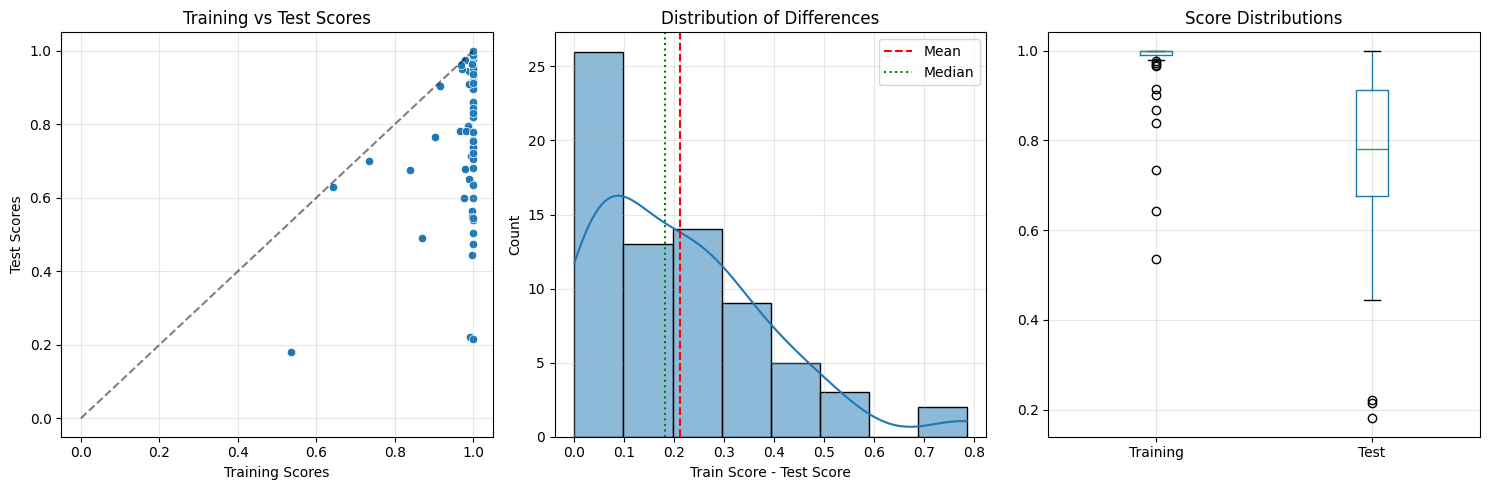

=== Overfitting Detection Report ===
Datasets: 72
Mean training score: 0.975
Mean test score: 0.764
Mean difference: 0.210 (SD=0.175)
Spearman rho: 0.208

=== Normality Test ===
Shapiro-Wilk p-value: 0.0001
Interpretation: Non-normal distribution

=== Statistical Tests ===
1. Paired t-test:
   t = 10.184, p = 0.00000
   Significant: ✅

2. Wilcoxon signed-rank test:
   W = 2556.000, p = 0.00000
   Significant: ✅

=== Effect Sizes ===
Cohen's d: 1.200 (large effect)
Rank-biserial correlation: 0.027 (small effect)


In [7]:
# Run the analysis
training_scores = [result['training_score'] for result in results.values()]
testing_scores = [result['testing_score'] for result in results.values()]
results = detect_overfitting(training_scores, testing_scores)

# Print results in a readable format
print("=== Overfitting Detection Report ===")
print(f"Datasets: {results['n_datasets']}")
print(f"Mean training score: {results['mean_train_score']:.3f}")
print(f"Mean test score: {results['mean_test_score']:.3f}")
print(f"Mean difference: {results['mean_difference']:.3f} (SD={results['std_difference']:.3f})")
print(f"Spearman rho: {stats.spearmanr(training_scores, testing_scores).correlation:.3f}")

print("\n=== Normality Test ===")
print(f"Shapiro-Wilk p-value: {results['normality_shapiro_p']:.4f}")
print("Interpretation:", "Normal distribution" if results['normal_distribution'] else "Non-normal distribution")

print("\n=== Statistical Tests ===")
print("1. Paired t-test:")
print(f"   t = {results['paired_ttest']['statistic']:.3f}, p = {results['paired_ttest']['p_value']:.5f}")
print(f"   Significant: {'✅' if results['paired_ttest']['significant'] else '❌'}")

print("\n2. Wilcoxon signed-rank test:")
print(f"   W = {results['wilcoxon_test']['statistic']:.3f}, p = {results['wilcoxon_test']['p_value']:.5f}")
print(f"   Significant: {'✅' if results['wilcoxon_test']['significant'] else '❌'}")

print("\n=== Effect Sizes ===")
print(f"Cohen's d: {results['cohens_d']:.3f} ({results['cohens_d_interpret']} effect)")
print(f"Rank-biserial correlation: {results['rank_biserial']:.3f} ({results['rank_biserial_interpret']} effect)")


# 2 - Genbooster

In [8]:
from os import name
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

estimators = [LinearRegression()]
name_estimators = ["LinearRegression"]


 ---------- GenBooster + LinearRegression


0it [00:00, ?it/s]


 ---------- 1 / 72 :  kr-vs-kp


1it [00:00,  2.21it/s]

Training Balanced Accuracy: 0.9480928346328172
Testing Balanced Accuracy: 0.9182957393483708

 ---------- 2 / 72 :  letter


2it [00:08,  4.76s/it]

Training Balanced Accuracy: 0.6532232216708022
Testing Balanced Accuracy: 0.6037087912087912

 ---------- 3 / 72 :  balance-scale


3it [00:08,  2.76s/it]

Training Balanced Accuracy: 0.6579835623313884
Testing Balanced Accuracy: 0.6492236337971365

 ---------- 4 / 72 :  mfeat-factors


4it [00:10,  2.50s/it]

Training Balanced Accuracy: 0.8712500000000001
Testing Balanced Accuracy: 0.8649999999999999

 ---------- 5 / 72 :  mfeat-fourier


5it [00:12,  2.35s/it]

Training Balanced Accuracy: 0.8174999999999999
Testing Balanced Accuracy: 0.7849999999999999

 ---------- 6 / 72 :  breast-w


6it [00:13,  1.64s/it]

Training Balanced Accuracy: 0.9810158838019196
Testing Balanced Accuracy: 0.962409420289855

 ---------- 7 / 72 :  mfeat-karhunen


7it [00:15,  1.80s/it]

Training Balanced Accuracy: 0.8699999999999999
Testing Balanced Accuracy: 0.865

 ---------- 8 / 72 :  mfeat-morphological


8it [00:16,  1.70s/it]

Training Balanced Accuracy: 0.75
Testing Balanced Accuracy: 0.7250000000000001

 ---------- 9 / 72 :  mfeat-zernike


9it [00:21,  2.61s/it]

Training Balanced Accuracy: 0.7987499999999998
Testing Balanced Accuracy: 0.74

 ---------- 10 / 72 :  cmc


10it [00:21,  2.00s/it]

Training Balanced Accuracy: 0.539420682309971
Testing Balanced Accuracy: 0.48957420514548927

 ---------- 11 / 72 :  optdigits


11it [00:23,  2.01s/it]

Training Balanced Accuracy: 0.8338839752605576
Testing Balanced Accuracy: 0.865

 ---------- 12 / 72 :  credit-approval


12it [00:24,  1.49s/it]

Training Balanced Accuracy: 0.8800414474732983
Testing Balanced Accuracy: 0.7980625931445604

 ---------- 13 / 72 :  credit-g


13it [00:24,  1.17s/it]

Training Balanced Accuracy: 0.6815476190476191
Testing Balanced Accuracy: 0.7059523809523809

 ---------- 14 / 72 :  pendigits


14it [00:26,  1.46s/it]

Training Balanced Accuracy: 0.9082342205793651
Testing Balanced Accuracy: 0.8939849624060152

 ---------- 15 / 72 :  diabetes


15it [00:27,  1.10s/it]

Training Balanced Accuracy: 0.7434696261682243
Testing Balanced Accuracy: 0.6457407407407407

 ---------- 16 / 72 :  spambase


16it [00:27,  1.09it/s]

Training Balanced Accuracy: 0.8971008789190608
Testing Balanced Accuracy: 0.8953865467099069

 ---------- 17 / 72 :  splice


17it [00:28,  1.19it/s]

Training Balanced Accuracy: 0.8904200133868808
Testing Balanced Accuracy: 0.8835470085470085

 ---------- 18 / 72 :  tic-tac-toe


18it [00:28,  1.40it/s]

Training Balanced Accuracy: 0.7092305954129476
Testing Balanced Accuracy: 0.7153432835820895

 ---------- 19 / 72 :  vehicle


19it [00:29,  1.33it/s]

Training Balanced Accuracy: 0.7512680047291669
Testing Balanced Accuracy: 0.7388257575757575

 ---------- 20 / 72 :  electricity


20it [00:29,  1.54it/s]

Training Balanced Accuracy: 0.7804471490091439
Testing Balanced Accuracy: 0.7631713554987212

 ---------- 21 / 72 :  satimage


21it [00:33,  1.45s/it]

Training Balanced Accuracy: 0.7904065610735302
Testing Balanced Accuracy: 0.7254887702816034

 ---------- 22 / 72 :  eucalyptus


22it [00:34,  1.36s/it]

Training Balanced Accuracy: 0.5992921311574563
Testing Balanced Accuracy: 0.5444643212085073

 ---------- 23 / 72 :  sick


23it [00:34,  1.09s/it]

Training Balanced Accuracy: 0.6421904761904762
Testing Balanced Accuracy: 0.5416666666666666

 ---------- 24 / 72 :  vowel


24it [00:37,  1.45s/it]

Training Balanced Accuracy: 0.7588383838383838
Testing Balanced Accuracy: 0.6565656565656567

 ---------- 25 / 72 :  isolet


25it [00:42,  2.61s/it]

Training Balanced Accuracy: 0.5353598014888339
Testing Balanced Accuracy: 0.4539835164835164

 ---------- 26 / 72 :  analcatdata_authorship


26it [00:43,  2.07s/it]

Training Balanced Accuracy: 0.9691163839829222
Testing Balanced Accuracy: 0.9847136047215497

 ---------- 27 / 72 :  analcatdata_dmft


27it [00:44,  1.79s/it]

Training Balanced Accuracy: 0.31318315240756367
Testing Balanced Accuracy: 0.2114058144165671

 ---------- 28 / 72 :  mnist_784


28it [00:47,  2.33s/it]

Training Balanced Accuracy: 0.6018919115939201
Testing Balanced Accuracy: 0.5142492099814755

 ---------- 29 / 72 :  pc4


29it [00:48,  1.77s/it]

Training Balanced Accuracy: 0.6706163207080265
Testing Balanced Accuracy: 0.5482954545454546

 ---------- 30 / 72 :  pc3


30it [00:48,  1.37s/it]

Training Balanced Accuracy: 0.5466884375956731
Testing Balanced Accuracy: 0.525

 ---------- 31 / 72 :  jm1


31it [00:49,  1.09s/it]

Training Balanced Accuracy: 0.5669233866908285
Testing Balanced Accuracy: 0.5454690237298934

 ---------- 32 / 72 :  kc2


32it [00:49,  1.17it/s]

Training Balanced Accuracy: 0.7185861091424521
Testing Balanced Accuracy: 0.651697699890471

 ---------- 33 / 72 :  kc1


33it [00:50,  1.36it/s]

Training Balanced Accuracy: 0.5635553470919324
Testing Balanced Accuracy: 0.5556403893872877

 ---------- 34 / 72 :  pc1


34it [00:50,  1.52it/s]

Training Balanced Accuracy: 0.5
Testing Balanced Accuracy: 0.5

 ---------- 35 / 72 :  adult


35it [00:50,  1.69it/s]

Training Balanced Accuracy: 0.7400971341967484
Testing Balanced Accuracy: 0.6551535087719298

 ---------- 36 / 72 :  Bioresponse


36it [00:51,  1.84it/s]

Training Balanced Accuracy: 0.7767986723709284
Testing Balanced Accuracy: 0.732331888295191

 ---------- 37 / 72 :  wdbc


37it [00:51,  2.11it/s]

Training Balanced Accuracy: 0.9478328173374613
Testing Balanced Accuracy: 0.9623015873015872

 ---------- 38 / 72 :  phoneme


38it [00:52,  2.38it/s]

Training Balanced Accuracy: 0.707737690038575
Testing Balanced Accuracy: 0.6642024281764636

 ---------- 39 / 72 :  qsar-biodeg


39it [00:52,  2.37it/s]

Training Balanced Accuracy: 0.8324861723727508
Testing Balanced Accuracy: 0.816967792615868

 ---------- 40 / 72 :  wall-robot-navigation


40it [00:53,  1.80it/s]

Training Balanced Accuracy: 0.653627904631567
Testing Balanced Accuracy: 0.5904361071027737

 ---------- 41 / 72 :  semeion


41it [00:55,  1.02s/it]

Training Balanced Accuracy: 0.5926607850658483
Testing Balanced Accuracy: 0.6

 ---------- 42 / 72 :  ilpd


42it [00:55,  1.24it/s]

Training Balanced Accuracy: 0.597766939872203
Testing Balanced Accuracy: 0.5581148121899362

 ---------- 43 / 72 :  madelon


43it [00:56,  1.44it/s]

Training Balanced Accuracy: 0.73625
Testing Balanced Accuracy: 0.7

 ---------- 44 / 72 :  nomao


44it [00:56,  1.53it/s]

Training Balanced Accuracy: 0.8829423602789812
Testing Balanced Accuracy: 0.9193963930806036

 ---------- 45 / 72 :  ozone-level-8hr


45it [00:58,  1.18it/s]

Training Balanced Accuracy: 0.5
Testing Balanced Accuracy: 0.5

 ---------- 46 / 72 :  cnae-9


46it [01:00,  1.45s/it]

Training Balanced Accuracy: 0.7333304959709455
Testing Balanced Accuracy: 0.699604743083004

 ---------- 47 / 72 :  first-order-theorem-proving


47it [01:02,  1.39s/it]

Training Balanced Accuracy: 0.2568945598032055
Testing Balanced Accuracy: 0.27648809523809526

 ---------- 48 / 72 :  banknote-authentication


48it [01:02,  1.06s/it]

Training Balanced Accuracy: 0.9954954954954955
Testing Balanced Accuracy: 1.0

 ---------- 49 / 72 :  blood-transfusion-service-center


49it [01:02,  1.22it/s]

Training Balanced Accuracy: 0.5951321966889054
Testing Balanced Accuracy: 0.611842105263158

 ---------- 50 / 72 :  PhishingWebsites


50it [01:03,  1.41it/s]

Training Balanced Accuracy: 0.9133593601218816
Testing Balanced Accuracy: 0.9122886931875696

 ---------- 51 / 72 :  cylinder-bands


51it [01:03,  1.72it/s]

Training Balanced Accuracy: 0.6772527472527472
Testing Balanced Accuracy: 0.6669004207573632

 ---------- 52 / 72 :  bank-marketing


52it [01:03,  1.86it/s]

Training Balanced Accuracy: 0.5602668372475554
Testing Balanced Accuracy: 0.5917464996315401

 ---------- 53 / 72 :  GesturePhaseSegmentationProcessed


53it [01:04,  1.44it/s]

Training Balanced Accuracy: 0.4052738438032556
Testing Balanced Accuracy: 0.3567099567099567

 ---------- 54 / 72 :  har


54it [01:06,  1.17it/s]

Training Balanced Accuracy: 0.6586891684653934
Testing Balanced Accuracy: 0.6022327522327522

 ---------- 55 / 72 :  dresses-sales


55it [01:06,  1.46it/s]

Training Balanced Accuracy: 0.6180213464696224
Testing Balanced Accuracy: 0.5049261083743842

 ---------- 56 / 72 :  texture


56it [01:08,  1.16s/it]

Training Balanced Accuracy: 0.9217171717171717
Testing Balanced Accuracy: 0.9090909090909093

 ---------- 57 / 72 :  connect-4


57it [01:09,  1.00s/it]

Training Balanced Accuracy: 0.36527957383567194
Testing Balanced Accuracy: 0.36229643372500514

 ---------- 58 / 72 :  MiceProtein


58it [01:13,  2.01s/it]

Training Balanced Accuracy: 0.7886130536130537
Testing Balanced Accuracy: 0.7212312030075188

 ---------- 59 / 72 :  steel-plates-fault


59it [01:15,  1.85s/it]

Training Balanced Accuracy: 0.5668243559177928
Testing Balanced Accuracy: 0.5421214137829045

 ---------- 60 / 72 :  climate-model-simulation-crashes


60it [01:15,  1.38s/it]

Training Balanced Accuracy: 0.6486486486486487
Testing Balanced Accuracy: 0.6111111111111112

 ---------- 61 / 72 :  wilt


61it [01:15,  1.06s/it]

Training Balanced Accuracy: 0.6660061646851607
Testing Balanced Accuracy: 0.6818181818181819

 ---------- 62 / 72 :  car


62it [01:16,  1.08it/s]

Training Balanced Accuracy: 0.5475360592569449
Testing Balanced Accuracy: 0.5132936507936507

 ---------- 63 / 72 :  segment


63it [01:17,  1.09s/it]

Training Balanced Accuracy: 0.821012708763058
Testing Balanced Accuracy: 0.8258268824771289

 ---------- 64 / 72 :  mfeat-pixel


64it [01:23,  2.42s/it]

Training Balanced Accuracy: 0.7024999999999999
Testing Balanced Accuracy: 0.7100000000000001

 ---------- 65 / 72 :  Fashion-MNIST


65it [01:27,  2.94s/it]

Training Balanced Accuracy: 0.5262499999999999
Testing Balanced Accuracy: 0.43499999999999994

 ---------- 66 / 72 :  jungle_chess_2pcs_raw_endgame_complete


66it [01:27,  2.19s/it]

Training Balanced Accuracy: 0.5535725243283519
Testing Balanced Accuracy: 0.5305783752385694

 ---------- 67 / 72 :  numerai28.6


67it [01:28,  1.67s/it]

Training Balanced Accuracy: 0.6070716881814764
Testing Balanced Accuracy: 0.5743074307430743

 ---------- 68 / 72 :  Devnagari-Script


68it [01:38,  4.07s/it]

Training Balanced Accuracy: 0.2718190537084399
Testing Balanced Accuracy: 0.15

 ---------- 69 / 72 :  CIFAR_10


69it [01:40,  3.60s/it]

Training Balanced Accuracy: 0.29875
Testing Balanced Accuracy: 0.205

 ---------- 70 / 72 :  Internet-Advertisements


70it [01:41,  2.66s/it]

Training Balanced Accuracy: 0.9168827257490049
Testing Balanced Accuracy: 0.9555647840531561

 ---------- 71 / 72 :  dna


71it [01:41,  2.07s/it]

Training Balanced Accuracy: 0.8917670682730924
Testing Balanced Accuracy: 0.8936965811965812

 ---------- 72 / 72 :  churn


72it [01:42,  1.42s/it]

Training Balanced Accuracy: 0.5900049020872572
Testing Balanced Accuracy: 0.5955149501661129


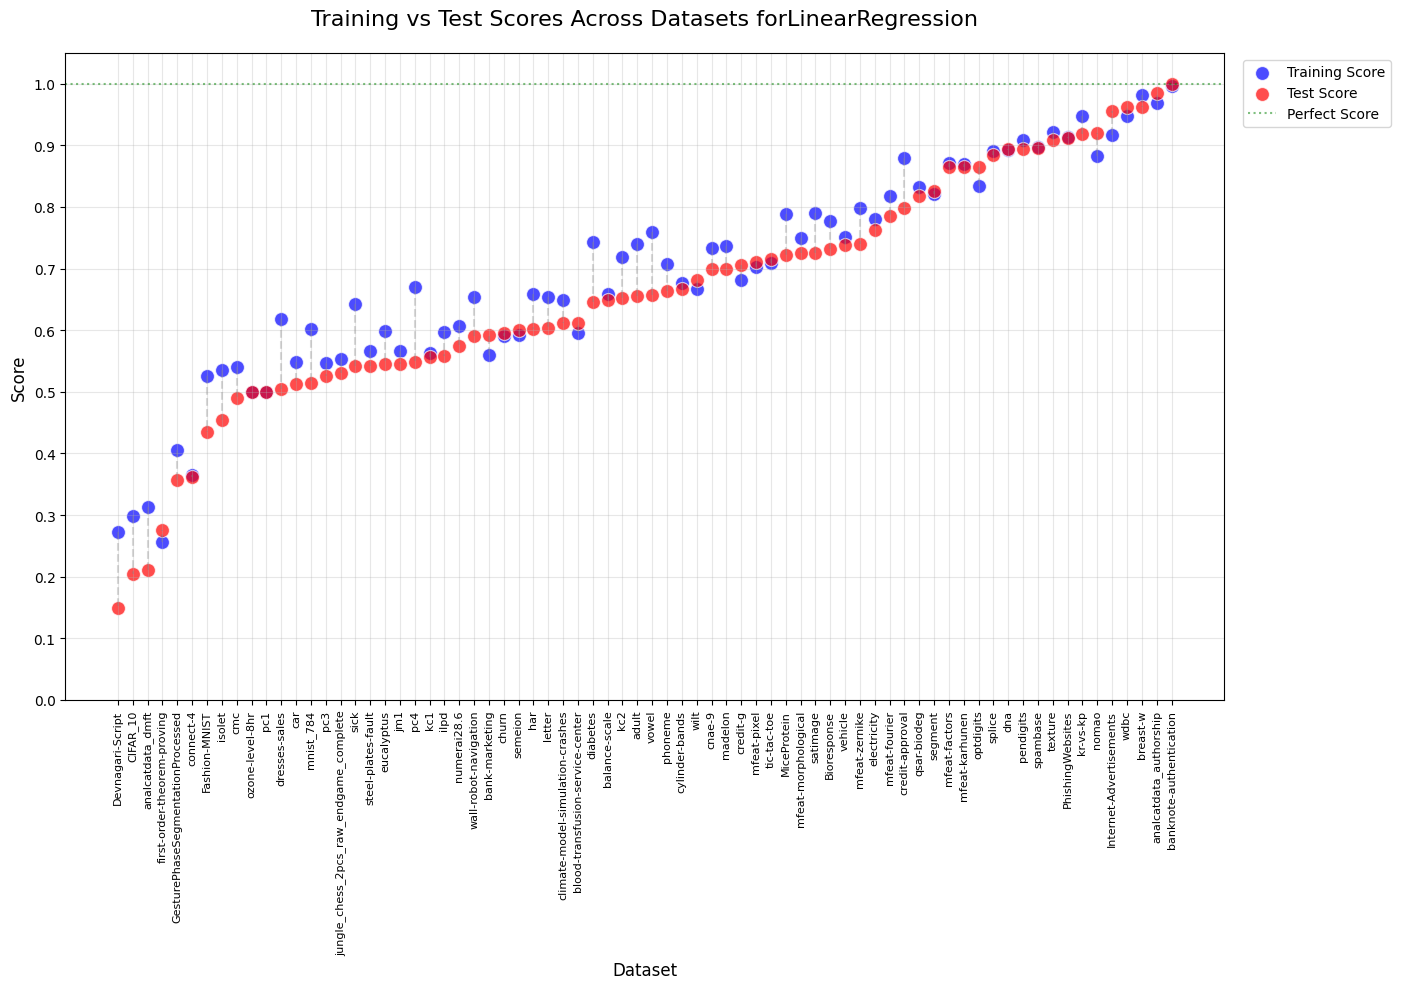

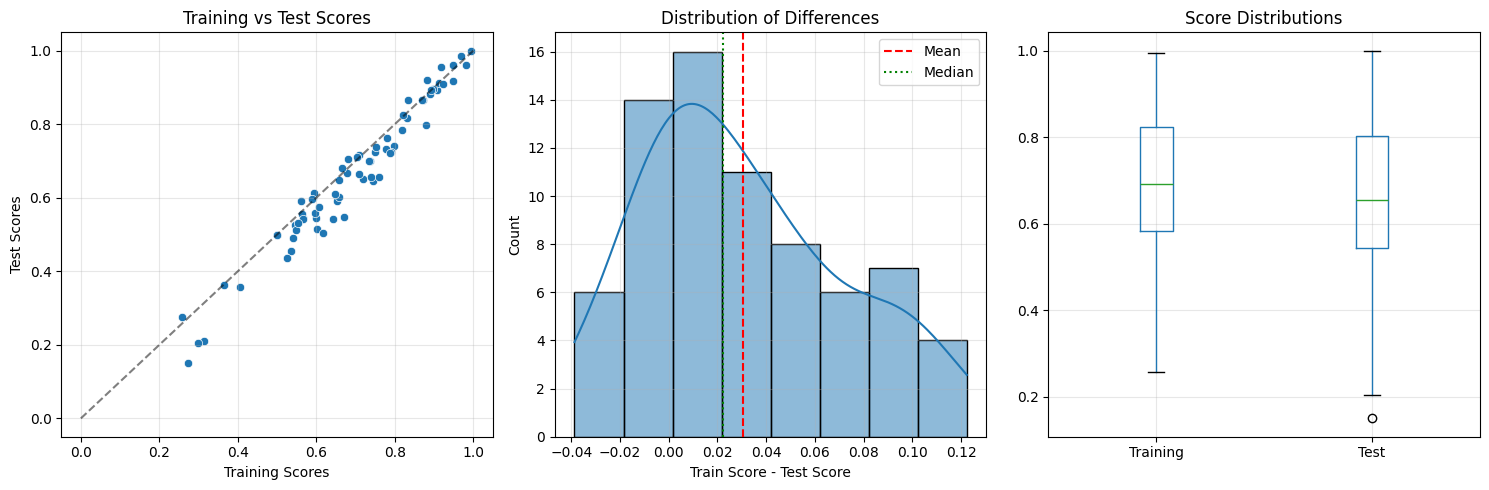

=== Overfitting Detection Report ===
Datasets: 72
Mean training score: 0.692
Mean test score: 0.661
Mean difference: 0.031 (SD=0.041)
Spearman rho: 0.972

=== Normality Test ===
Shapiro-Wilk p-value: 0.0153
Interpretation: Non-normal distribution

=== Statistical Tests ===
1. Paired t-test:
   t = 6.302, p = 0.00000
   Significant: ✅

2. Wilcoxon signed-rank test:
   W = 2125.000, p = 0.00000
   Significant: ✅

=== Effect Sizes ===
Cohen's d: 0.743 (medium effect)
Rank-biserial correlation: 0.191 (small effect)


In [9]:
balanced_accuracy_scorer = make_scorer(balanced_accuracy_score)

for j, est in enumerate(estimators):
  results = {}
  print("\n ---------- GenBooster +", name_estimators[j])
  try:
    for i, dataset in tqdm(enumerate(clf_datasets.items())):
      dataset_name = dataset[0]
      print("\n ----------", (i + 1), "/", len(clf_datasets.items()), ": ", dataset_name)
      try:
        X, y = dataset[1]['dataset'][0], dataset[1]['dataset'][1]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
        X_train = X_train.astype(np.float64)
        X_test = X_test.astype(np.float64)
        # Split dataset into training and testing sets
        model = BoosterClassifier(base_estimator=est)
        model.fit(X_train, y_train)
        y_pred_train = model.predict(X_train)
        y_pred = model.predict(X_test)
        # Calculate balanced accuracy
        balanced_acc_train = balanced_accuracy_score(y_train, y_pred_train)
        balanced_acc_test = balanced_accuracy_score(y_test, y_pred)
        print("Training Balanced Accuracy:", balanced_acc_train)
        print("Testing Balanced Accuracy:", balanced_acc_test)
        results[dataset_name] = {"training_score": balanced_acc_train,
                                "testing_score": balanced_acc_test}
      except Exception as e:
        print("Error", e)
        continue
  except Exception as e:
    print("Error", e)
    continue

  # Your data
  data = results

  # Convert to DataFrame - correct approach
  df = pd.DataFrame.from_dict({(i,j): data[i][j]
                            for i in data.keys()
                            for j in data[i].keys()},
                            orient='index')

  # The index is a MultiIndex with (dataset, score_type)
  # Let's properly unpack it
  df = df.reset_index()
  df.columns = ['index', 'score']  # Temporary column names

  # Split the multi-index into separate columns
  df[['dataset', 'score_type']] = pd.DataFrame(df['index'].tolist(), index=df.index)
  df = df.drop(columns=['index'])

  # Now pivot the data
  plot_df = df.pivot(index='dataset', columns='score_type', values='score')

  # Sort by test score for better visualization
  plot_df = plot_df.sort_values('testing_score')

  # Create figure
  plt.figure(figsize=(14, 10), dpi=100)

  # Plot training and test scores
  sns.scatterplot(data=plot_df, x=plot_df.index, y='training_score',
                  color='blue', label='Training Score', s=100, alpha=0.7)
  sns.scatterplot(data=plot_df, x=plot_df.index, y='testing_score',
                  color='red', label='Test Score', s=100, alpha=0.7)

  # Add connecting lines
  for i, dataset in enumerate(plot_df.index):
      plt.plot([i, i], [plot_df.loc[dataset, 'training_score'],
                        plot_df.loc[dataset, 'testing_score']],
              color='gray', alpha=0.3, linestyle='--')

  # Add perfect score line
  plt.axhline(1.0, color='green', linestyle=':', alpha=0.5, label='Perfect Score')

  # Customize plot
  plt.title(f'Training vs Test Scores Across Datasets for' + name_estimators[j], fontsize=16, pad=20)
  plt.xlabel('Dataset', fontsize=12)
  plt.ylabel('Score', fontsize=12)
  plt.xticks(rotation=90, fontsize=8)
  plt.yticks(np.arange(0, 1.1, 0.1))
  plt.ylim(0, 1.05)
  plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
  plt.grid(True, alpha=0.3)

  # Adjust layout
  plt.tight_layout()
  plt.show()

  # Run the analysis
  training_scores = [result['training_score'] for result in results.values()]
  testing_scores = [result['testing_score'] for result in results.values()]
  results = detect_overfitting(training_scores, testing_scores)

  # Print results in a readable format
  print("=== Overfitting Detection Report ===")
  print(f"Datasets: {results['n_datasets']}")
  print(f"Mean training score: {results['mean_train_score']:.3f}")
  print(f"Mean test score: {results['mean_test_score']:.3f}")
  print(f"Mean difference: {results['mean_difference']:.3f} (SD={results['std_difference']:.3f})")
  print(f"Spearman rho: {stats.spearmanr(training_scores, testing_scores).correlation:.3f}")

  print("\n=== Normality Test ===")
  print(f"Shapiro-Wilk p-value: {results['normality_shapiro_p']:.4f}")
  print("Interpretation:", "Normal distribution" if results['normal_distribution'] else "Non-normal distribution")

  print("\n=== Statistical Tests ===")
  print("1. Paired t-test:")
  print(f"   t = {results['paired_ttest']['statistic']:.3f}, p = {results['paired_ttest']['p_value']:.5f}")
  print(f"   Significant: {'✅' if results['paired_ttest']['significant'] else '❌'}")

  print("\n2. Wilcoxon signed-rank test:")
  print(f"   W = {results['wilcoxon_test']['statistic']:.3f}, p = {results['wilcoxon_test']['p_value']:.5f}")
  print(f"   Significant: {'✅' if results['wilcoxon_test']['significant'] else '❌'}")

  print("\n=== Effect Sizes ===")
  print(f"Cohen's d: {results['cohens_d']:.3f} ({results['cohens_d_interpret']} effect)")
  print(f"Rank-biserial correlation: {results['rank_biserial']:.3f} ({results['rank_biserial_interpret']} effect)")